In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [77]:
# Getting the CSV file with all the information merged together
ml_df = pd.read_csv('Resources/all_data.csv', index_col=False)
ml_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,followers,songs,genre_1,genre_2,playlist_uri,track_uri,popularity,artist_name,song_name,popular
0,0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"4,113,578",52,K-Pop,Pop,spotify:playlist:37i9dQZF1DX9tPFwDMOaN1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,88,BLACKPINK,Pink Venom,1
1,1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"295,173",70,Pop,Rock,spotify:playlist:37i9dQZF1DX6tPTxr8qwRe,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
2,2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"2,642,529",87,Pop,Indie,spotify:playlist:37i9dQZF1DWUa8ZRTfalHk,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
3,3,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"762,848",50,Pop,Pop,spotify:playlist:37i9dQZF1DX0kbJZpiYdZl,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
4,4,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"31,728,611",50,Pop,R&B,spotify:playlist:37i9dQZF1DXcBWIGoYBM5M,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1


In [78]:
ml_df.count()
#ml_df['acousticness'].value_counts()

Unnamed: 0          12419
danceability        12419
energy              12419
key                 12419
loudness            12419
mode                12419
speechiness         12419
acousticness        12419
instrumentalness    12419
liveness            12419
valence             12419
tempo               12419
type                12419
id                  12419
uri                 12419
track_href          12419
analysis_url        12419
duration_ms         12419
time_signature      12419
playlist_name       12419
followers           12419
songs               12419
genre_1             12419
genre_2             12419
playlist_uri        12419
track_uri           12419
popularity          12419
artist_name         12419
song_name           12419
popular             12419
dtype: int64

In [85]:
artist_song_df = ml_df.drop_duplicates(subset=['artist_name','song_name'])
song_only_df = ml_df.drop_duplicates(subset=['song_name'])
ml_df = ml_df.drop_duplicates(subset=['track_uri'])

In [83]:
print(ml_df.danceability.count())
print(artist_song_df.danceability.count())
print(song_only_df.danceability.count())
print(track_uri_df.danceability.count())

12419
6687
6488
6756


In [86]:
# Dropping columns which is specific for each song (like name and uri)
ml_df = ml_df.drop(columns=['Unnamed: 0', 'followers', 'songs',
                            'playlist_uri','track_uri','artist_name',
                            'song_name', 'analysis_url', 'id','uri',
                            'time_signature', 'playlist_name','track_href',
                            'type', 'mode' ])
ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.02020,0.000000,0.259,0.745,90.031,186964,K-Pop,Pop,88,1
7,0.646,0.640,8,-5.554,0.0304,0.00119,0.000000,0.138,0.127,105.957,175699,Pop,Adult Contemporary,69,1
11,0.950,0.891,2,-2.653,0.2410,0.06450,0.000018,0.309,0.912,133.010,170977,Rap,K-Pop,89,1
22,0.762,0.861,0,-3.296,0.0955,0.01850,0.000000,0.264,0.955,120.048,172714,Pop,Indie,90,1
28,0.871,0.485,7,-8.294,0.0411,0.52700,0.000074,0.169,0.494,119.976,219036,Pop,Indie,76,1


In [87]:
# Determining the number of unique values in each column.
cat_ml = ml_df.dtypes[ml_df.dtypes == 'object'].index.tolist()

ml_df[cat_ml].nunique()

genre_1    17
genre_2    20
dtype: int64

In [88]:
cat_ml

['genre_1', 'genre_2']

In [89]:
genre_type_count = ml_df.genre_1.value_counts()
genre_type_count

Indie                744
Rock                 715
Pop                  690
Electronic           636
Jazz                 515
Instrumental         486
Blues                409
Latin                375
Singer-Songwriter    337
R&B                  336
Country              333
Metal                317
Rap                  283
Christian            177
Classical            153
K-Pop                150
Alternative          100
Name: genre_1, dtype: int64

<AxesSubplot:ylabel='Density'>

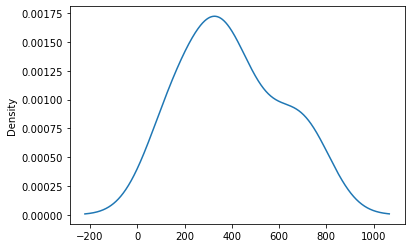

In [90]:
genre_type_count.plot.density()

In [17]:
ml_nogenre = ml_df.copy()

In [18]:
ml_nogenre = ml_nogenre.drop(columns=['genre_1','genre_2'])
ml_nogenre.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.02020,0.000000,0.259,0.745,90.031,186964,88,1
7,0.646,0.640,8,-5.554,0.0304,0.00119,0.000000,0.138,0.127,105.957,175699,69,1
11,0.950,0.891,2,-2.653,0.2410,0.06450,0.000018,0.309,0.912,133.010,170977,89,1
22,0.762,0.861,0,-3.296,0.0955,0.01850,0.000000,0.264,0.955,120.048,172714,90,1
28,0.871,0.485,7,-8.294,0.0411,0.52700,0.000074,0.169,0.494,119.976,219036,76,1


### BEFORE running and genre transformation code. We will attempt to run DL without genre.

In [91]:
# Selecting which values to replace
replace_genre = list(genre_type_count[genre_type_count < 300].index)

for song in replace_genre:
    ml_df.genre_1 = ml_df.genre_1.replace(song,'Other')
    
ml_df.genre_1.value_counts()

Other                863
Indie                744
Rock                 715
Pop                  690
Electronic           636
Jazz                 515
Instrumental         486
Blues                409
Latin                375
Singer-Songwriter    337
R&B                  336
Country              333
Metal                317
Name: genre_1, dtype: int64

In [37]:
g2_type_count = ml_df.genre_2.value_counts()
g2_type_count

Pop                   1542
Rock                   811
Indie                  669
Ambient                486
Alternative            459
Electronic             434
Workout                346
Rap                    325
Instrumental           323
Funk                   309
Roots                  289
Gospel                 177
Gaming                 149
Acoustic               100
Country                 96
K-Pop                   75
Adult Contemporary      43
Metal                   30
Reggaeton               14
R&B                     10
Name: genre_2, dtype: int64

<AxesSubplot:ylabel='Density'>

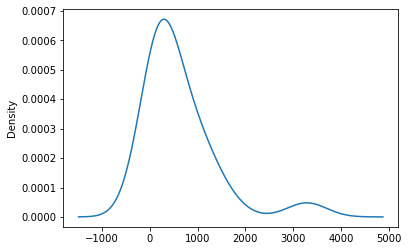

In [47]:
g2_type_count.plot.density()

In [59]:
# Selecting which values to replace
replace_genre2 = list(g2_type_count[g2_type_count < 550].index)

for song in replace_genre2:
    ml_df.genre_2 = ml_df.genre_2.replace(song,'Other')
    
ml_df.genre_2.value_counts()

Other          3473
Pop            3287
Indie          1569
Rock           1123
Alternative    1023
Workout        1020
Electronic      924
Name: genre_2, dtype: int64

In [60]:
save_ml_df = ml_df.copy()
save_ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [92]:
# Transposing the genre variability (trying with both genres first, than with only genre2)
# OneHoteEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce an encoded DF

encode_df = pd.DataFrame(enc.fit_transform(ml_df.genre_1.values.reshape(-1,1)))
encode_df.columns = enc.get_feature_names(['genre_1'])

encode2_df = pd.DataFrame(enc.fit_transform(ml_df.genre_2.values.reshape(-1,1)))
encode2_df.columns = enc.get_feature_names(['genre_2'])

print(encode_df.head())
print(encode2_df.head())

   genre_1_Blues  genre_1_Country  genre_1_Electronic  genre_1_Indie  \
0            0.0              0.0                 0.0            0.0   
1            0.0              0.0                 0.0            0.0   
2            0.0              0.0                 0.0            0.0   
3            0.0              0.0                 0.0            0.0   
4            0.0              0.0                 0.0            0.0   

   genre_1_Instrumental  genre_1_Jazz  genre_1_Latin  genre_1_Metal  \
0                   0.0           0.0            0.0            0.0   
1                   0.0           0.0            0.0            0.0   
2                   0.0           0.0            0.0            0.0   
3                   0.0           0.0            0.0            0.0   
4                   0.0           0.0            0.0            0.0   

   genre_1_Other  genre_1_Pop  genre_1_R&B  genre_1_Rock  \
0            1.0          0.0          0.0           0.0   
1            0.0    

/Users/bneves/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bneves/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [93]:
genres = cat_ml

In [67]:
save_ml_df = ml_df.copy()
save_ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [72]:
ml_df = save_ml_df.copy()
ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [94]:
# MErging genre1 then genre2 and drop originals in the process

ml_df = ml_df.merge(encode_df,left_index=True, right_index=True)
#ml_df = ml_df.merge(encode2_df, left_index=True, right_index=True)

ml_df = ml_df.drop(columns=genres)

ml_df.count()

danceability                 3350
energy                       3350
key                          3350
loudness                     3350
speechiness                  3350
acousticness                 3350
instrumentalness             3350
liveness                     3350
valence                      3350
tempo                        3350
duration_ms                  3350
popularity                   3350
popular                      3350
genre_1_Blues                3350
genre_1_Country              3350
genre_1_Electronic           3350
genre_1_Indie                3350
genre_1_Instrumental         3350
genre_1_Jazz                 3350
genre_1_Latin                3350
genre_1_Metal                3350
genre_1_Other                3350
genre_1_Pop                  3350
genre_1_R&B                  3350
genre_1_Rock                 3350
genre_1_Singer-Songwriter    3350
dtype: int64

In [95]:
ml_df.to_csv('Resources/ready.csv')

### Here we are splitting the strategy into two possibilities:
1 - We will use the popular column (0 or 1) as the target. Criteria for 1 is: popularity > 60

2 - Use the popularity scores as target and try to predict a reasonable score comparing to the original spotify score.

In [74]:
save2_ml_df = ml_df.copy()
save2_ml_df.tail()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popular,genre_1_Electronic,genre_1_Indie,genre_1_Latin,genre_1_Other,genre_1_Pop,genre_1_Rap,genre_1_Rock
12414,0.582,0.730,11,-7.678,0.0402,0.26000,0.000004,0.1100,0.240,129.981,201668,57,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12415,0.582,0.730,11,-7.678,0.0402,0.26000,0.000004,0.1100,0.240,129.981,201668,57,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12416,0.481,0.917,2,-3.366,0.0385,0.00104,0.000004,0.3980,0.377,108.747,185317,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12417,0.628,0.787,4,-6.540,0.0328,0.00376,0.027200,0.0872,0.611,137.981,179947,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12418,0.384,0.623,2,-8.022,0.0282,0.10400,0.207000,0.1270,0.458,77.067,310840,55,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Splitting the preprocessed data into features and targets

X = ml_nogenre.drop(columns=['popular', 'popularity'])
y = ml_nogenre['popular'].values

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y) # Test size is 25%

In [21]:
# Scaling the dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
print(len(X_train_scaled))
print(len(X_test))

5015
1672


## Done prep. Now it is Play time with neural networks!

In [23]:
len(X_train_scaled[0])

11

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='LeakyReLU'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Creating a checkpoint save

os.makedirs("checkpoint_clean_nogenre/", exist_ok=True)
checkpoint_path = "checkpoint_clean_nogenre/weights.{epoch:02d}.hdf5"

In [26]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=10)

In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

Epoch 1/150
157/157 [==============================] - 0s 422us/step - loss: 0.6911 - accuracy: 0.5440
Epoch 2/150
157/157 [==============================] - 0s 360us/step - loss: 0.6498 - accuracy: 0.6190
Epoch 3/150
157/157 [==============================] - 0s 365us/step - loss: 0.6074 - accuracy: 0.6521
Epoch 4/150
157/157 [==============================] - 0s 363us/step - loss: 0.5899 - accuracy: 0.6724
Epoch 5/150
157/157 [==============================] - 0s 363us/step - loss: 0.5911 - accuracy: 0.6661
Epoch 6/150
157/157 [==============================] - 0s 361us/step - loss: 0.5835 - accuracy: 0.6675
Epoch 7/150
157/157 [==============================] - 0s 365us/step - loss: 0.5812 - accuracy: 0.6842
Epoch 8/150
157/157 [==============================] - 0s 360us/step - loss: 0.5773 - accuracy: 0.6698
Epoch 9/150
157/157 [==============================] - 0s 367us/step - loss: 0.5877 - accuracy: 0.6793
Epoch 10/150
157/157 [==============================] - 0s 363us/step - l

157/157 [==============================] - 0s 375us/step - loss: 0.5560 - accuracy: 0.7144
Epoch 76/150
157/157 [==============================] - 0s 365us/step - loss: 0.5434 - accuracy: 0.7247
Epoch 77/150
157/157 [==============================] - 0s 363us/step - loss: 0.5467 - accuracy: 0.7225
Epoch 78/150
157/157 [==============================] - 0s 361us/step - loss: 0.5393 - accuracy: 0.7259
Epoch 79/150
157/157 [==============================] - 0s 359us/step - loss: 0.5509 - accuracy: 0.7187
Epoch 80/150
157/157 [==============================] - 0s 361us/step - loss: 0.5352 - accuracy: 0.7349

Epoch 00080: saving model to checkpoint_clean_nogenre/weights.80.hdf5
Epoch 81/150
157/157 [==============================] - 0s 365us/step - loss: 0.5495 - accuracy: 0.7171
Epoch 82/150
157/157 [==============================] - 0s 362us/step - loss: 0.5350 - accuracy: 0.7355
Epoch 83/150
157/157 [==============================] - 0s 361us/step - loss: 0.5477 - accuracy: 0.7216
Epoch 

157/157 [==============================] - 0s 366us/step - loss: 0.5440 - accuracy: 0.7275
Epoch 149/150
157/157 [==============================] - 0s 370us/step - loss: 0.5461 - accuracy: 0.7237
Epoch 150/150
157/157 [==============================] - 0s 368us/step - loss: 0.5342 - accuracy: 0.7304

Epoch 00150: saving model to checkpoint_clean_nogenre/weights.150.hdf5


In [34]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

53/53 - 0s - loss: 0.5953 - accuracy: 0.6770
Loss: 0.5953179597854614, Accuracy: 0.6770334839820862


### Runig w/o scaler

In [30]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
157/157 [==============================] - 0s 565us/step - loss: 1112.9689 - accuracy: 0.5308
Epoch 2/100
157/157 [==============================] - 0s 504us/step - loss: 665.8787 - accuracy: 0.5380
Epoch 3/100
157/157 [==============================] - 0s 500us/step - loss: 441.6290 - accuracy: 0.5484
Epoch 4/100
157/157 [==============================] - 0s 502us/step - loss: 386.6263 - accuracy: 0.5430
Epoch 5/100
157/157 [==============================] - 0s 504us/step - loss: 418.0680 - accuracy: 0.5334
Epoch 6/100
157/157 [==============================] - 0s 502us/step - loss: 354.5544 - accuracy: 0.5410
Epoch 7/100
157/157 [==============================] - 0s 497us/step - loss: 439.3140 - accuracy: 0.5224
Epoch 8/100
157/157 [==============================] - 0s 501us/step - loss: 327.3257 - accuracy: 0.5384
Epoch 9/100
157/157 [==============================] - 0s 501us/step - loss: 261.7123 - accuracy: 0.5308
Epoch 10/100
157/157 [==============================] 

157/157 [==============================] - 0s 507us/step - loss: 149.6965 - accuracy: 0.5404
Epoch 74/100
157/157 [==============================] - 0s 505us/step - loss: 122.1237 - accuracy: 0.5454
Epoch 75/100
157/157 [==============================] - 0s 503us/step - loss: 288.1003 - accuracy: 0.5320
Epoch 76/100
157/157 [==============================] - 0s 504us/step - loss: 163.6427 - accuracy: 0.5416
Epoch 77/100
157/157 [==============================] - 0s 498us/step - loss: 192.7566 - accuracy: 0.5376
Epoch 78/100
157/157 [==============================] - 0s 496us/step - loss: 162.7076 - accuracy: 0.5569
Epoch 79/100
157/157 [==============================] - 0s 507us/step - loss: 195.0687 - accuracy: 0.5310
Epoch 80/100
157/157 [==============================] - 0s 513us/step - loss: 188.5000 - accuracy: 0.5400

Epoch 00080: saving model to checkpoint_clean_nogenre/weights.80.hdf5
Epoch 81/100
157/157 [==============================] - 0s 512us/step - loss: 200.2150 - accur

In [35]:
# Export our model to HDF5 file
nn.save("relu16_relu8_sigmoid_a68_clean.h5")

### Now: CLEAN WITH GENRE1

In [62]:
# Splitting the preprocessed data into features and targets

X = ml_df.drop(columns=['popular', 'popularity'])
y = ml_df['popular'].values

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y) # Test size is 25%

In [63]:
# Scaling the dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
print(len(X_train_scaled))
print(len(X_test))
print(len(X_train_scaled[0]))

2438
813
24


In [72]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# Creating a checkpoint save

os.makedirs("checkpoint_clean/", exist_ok=True)
checkpoint_path = "checkpoint_clean/weights.{epoch:02d}.hdf5"

In [74]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
77/77 [==============================] - 0s 489us/step - loss: 0.7572 - accuracy: 0.4613
Epoch 2/100
77/77 [==============================] - 0s 412us/step - loss: 0.6504 - accuracy: 0.6156
Epoch 3/100
77/77 [==============================] - 0s 395us/step - loss: 0.5833 - accuracy: 0.7142
Epoch 4/100
77/77 [==============================] - 0s 396us/step - loss: 0.5368 - accuracy: 0.7447
Epoch 5/100
77/77 [==============================] - 0s 387us/step - loss: 0.5156 - accuracy: 0.7543
Epoch 6/100
77/77 [==============================] - 0s 391us/step - loss: 0.4758 - accuracy: 0.7822
Epoch 7/100
77/77 [==============================] - 0s 389us/step - loss: 0.4870 - accuracy: 0.7644
Epoch 8/100
77/77 [==============================] - 0s 389us/step - loss: 0.4702 - accuracy: 0.7728
Epoch 9/100
77/77 [==============================] - 0s 394us/step - loss: 0.4661 - accuracy: 0.7682
Epoch 10/100
77/77 [==============================] - 0s 391us/step - loss: 0.4601 - accura

77/77 [==============================] - 0s 405us/step - loss: 0.3442 - accuracy: 0.8585
Epoch 77/100
77/77 [==============================] - 0s 413us/step - loss: 0.3521 - accuracy: 0.8458
Epoch 78/100
77/77 [==============================] - 0s 407us/step - loss: 0.3657 - accuracy: 0.8409
Epoch 79/100
77/77 [==============================] - 0s 412us/step - loss: 0.3591 - accuracy: 0.8482
Epoch 80/100
77/77 [==============================] - 0s 406us/step - loss: 0.3644 - accuracy: 0.8477

Epoch 00080: saving model to checkpoint_clean_nogenre/weights.80.hdf5
Epoch 81/100
77/77 [==============================] - 0s 420us/step - loss: 0.3631 - accuracy: 0.8440
Epoch 82/100
77/77 [==============================] - 0s 411us/step - loss: 0.3515 - accuracy: 0.8463
Epoch 83/100
77/77 [==============================] - 0s 431us/step - loss: 0.3650 - accuracy: 0.8428
Epoch 84/100
77/77 [==============================] - 0s 422us/step - loss: 0.3470 - accuracy: 0.8486
Epoch 85/100
77/77 [====

In [75]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 0.4773 - accuracy: 0.7811
Loss: 0.47726234793663025, Accuracy: 0.7810578346252441


In [76]:
# Export our model to HDF5 file
nn.save("leakrelu16_relu8_sigmoid_a78_cleanwg.h5")

In [69]:
fit_model

In [53]:
X.corr(method='pearson')

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,genre_1_Indie,genre_1_Instrumental,genre_1_Jazz,genre_1_Latin,genre_1_Metal,genre_1_Other,genre_1_Pop,genre_1_R&B,genre_1_Rock,genre_1_Singer-Songwriter
danceability,1.000000,0.224812,0.047862,0.563559,0.179713,-0.273533,-0.363060,-0.239815,0.617990,-0.015474,...,0.072695,-0.222427,0.138402,-0.117821,-0.002960,-0.015394,-0.014761,-0.012178,0.235515,0.100535
energy,0.224812,1.000000,0.073495,0.739398,0.120099,-0.782847,-0.459882,0.285016,0.361364,0.273133,...,0.047813,-0.400668,0.073237,-0.255266,0.075498,-0.033102,0.086564,0.117551,0.096028,0.040581
key,0.047862,0.073495,1.000000,0.062505,0.032797,-0.049515,-0.003884,0.006037,0.057366,0.030083,...,0.013356,-0.026227,0.006146,-0.008844,-0.006243,0.025478,-0.011284,-0.031070,0.021772,0.021997
loudness,0.563559,0.739398,0.062505,1.000000,0.160708,-0.687986,-0.673948,-0.022366,0.498554,0.285917,...,0.087175,-0.484482,0.080556,-0.218843,-0.005825,0.030406,0.054524,0.109555,0.155152,0.064087
speechiness,0.179713,0.120099,0.032797,0.160708,1.000000,-0.090817,-0.174746,0.025312,0.076834,0.122042,...,0.030327,-0.058715,0.101502,-0.104618,-0.016527,-0.059510,0.091032,-0.023469,0.092699,0.005912
acousticness,-0.273533,-0.782847,-0.049515,-0.687986,-0.090817,1.000000,0.501071,-0.161413,-0.335907,-0.263164,...,-0.046251,0.350469,-0.074594,0.274444,-0.058684,0.017572,-0.061244,-0.112857,-0.089468,-0.054243
instrumentalness,-0.363060,-0.459882,-0.003884,-0.673948,-0.174746,0.501071,1.000000,0.028439,-0.316674,-0.244219,...,-0.116986,0.253030,0.030870,0.356595,-0.014431,0.029002,-0.074293,-0.105386,-0.166770,-0.049783
liveness,-0.239815,0.285016,0.006037,-0.022366,0.025312,-0.161413,0.028439,1.000000,-0.165138,0.008265,...,-0.015873,-0.106277,-0.004573,-0.076242,0.122230,-0.001534,0.115289,0.013646,-0.057531,-0.056329
valence,0.617990,0.361364,0.057366,0.498554,0.076834,-0.335907,-0.316674,-0.165138,1.000000,0.148244,...,0.049429,-0.207216,0.075459,-0.081113,-0.034090,-0.008970,-0.005617,0.065635,0.136595,0.042613
tempo,-0.015474,0.273133,0.030083,0.285917,0.122042,-0.263164,-0.244219,0.008265,0.148244,1.000000,...,0.033576,-0.115762,-0.032274,-0.099926,-0.015885,0.005325,-0.017394,0.075823,0.025384,0.007256


In [55]:
XTRAIN = pd.DataFrame(X_train_scaled)
XTRAIN.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.982810,0.612973,0.756598,0.465736,-0.511534,-0.746809,-0.277171,-0.691581,1.549985,-0.518732,...,-0.19465,-0.326608,-0.358753,2.863564,-0.181799,-0.454239,-0.326608,-0.18538,-0.280644,-0.222497
1,-0.596615,0.913559,-1.230490,0.209677,-0.368945,-0.809935,-0.662709,-0.247138,-1.064058,-0.584928,...,-0.19465,-0.326608,-0.358753,-0.349215,-0.181799,2.201482,-0.326608,-0.18538,-0.280644,-0.222497
2,-0.973866,0.056334,-0.095011,0.310432,-0.686408,-0.034771,-0.676944,-0.829364,-0.336638,2.175669,...,-0.19465,-0.326608,-0.358753,-0.349215,-0.181799,2.201482,-0.326608,-0.18538,-0.280644,-0.222497
3,0.771549,-0.058705,0.188858,0.395400,-0.674302,-0.543369,-0.676944,0.636870,0.332433,-0.056546,...,-0.19465,3.061775,-0.358753,-0.349215,-0.181799,-0.454239,-0.326608,-0.18538,-0.280644,-0.222497
4,1.023050,0.431138,1.608207,0.473052,-0.581484,-0.749501,0.322490,-1.000069,1.588885,0.204359,...,-0.19465,-0.326608,-0.358753,-0.349215,-0.181799,-0.454239,-0.326608,-0.18538,-0.280644,4.494441


In [54]:
ml_df.corr(method='pearson')

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,genre_1_Indie,genre_1_Instrumental,genre_1_Jazz,genre_1_Latin,genre_1_Metal,genre_1_Other,genre_1_Pop,genre_1_R&B,genre_1_Rock,genre_1_Singer-Songwriter
danceability,1.000000,0.224812,0.047862,0.563559,0.179713,-0.273533,-0.363060,-0.239815,0.617990,-0.015474,...,0.072695,-0.222427,0.138402,-0.117821,-0.002960,-0.015394,-0.014761,-0.012178,0.235515,0.100535
energy,0.224812,1.000000,0.073495,0.739398,0.120099,-0.782847,-0.459882,0.285016,0.361364,0.273133,...,0.047813,-0.400668,0.073237,-0.255266,0.075498,-0.033102,0.086564,0.117551,0.096028,0.040581
key,0.047862,0.073495,1.000000,0.062505,0.032797,-0.049515,-0.003884,0.006037,0.057366,0.030083,...,0.013356,-0.026227,0.006146,-0.008844,-0.006243,0.025478,-0.011284,-0.031070,0.021772,0.021997
loudness,0.563559,0.739398,0.062505,1.000000,0.160708,-0.687986,-0.673948,-0.022366,0.498554,0.285917,...,0.087175,-0.484482,0.080556,-0.218843,-0.005825,0.030406,0.054524,0.109555,0.155152,0.064087
speechiness,0.179713,0.120099,0.032797,0.160708,1.000000,-0.090817,-0.174746,0.025312,0.076834,0.122042,...,0.030327,-0.058715,0.101502,-0.104618,-0.016527,-0.059510,0.091032,-0.023469,0.092699,0.005912
acousticness,-0.273533,-0.782847,-0.049515,-0.687986,-0.090817,1.000000,0.501071,-0.161413,-0.335907,-0.263164,...,-0.046251,0.350469,-0.074594,0.274444,-0.058684,0.017572,-0.061244,-0.112857,-0.089468,-0.054243
instrumentalness,-0.363060,-0.459882,-0.003884,-0.673948,-0.174746,0.501071,1.000000,0.028439,-0.316674,-0.244219,...,-0.116986,0.253030,0.030870,0.356595,-0.014431,0.029002,-0.074293,-0.105386,-0.166770,-0.049783
liveness,-0.239815,0.285016,0.006037,-0.022366,0.025312,-0.161413,0.028439,1.000000,-0.165138,0.008265,...,-0.015873,-0.106277,-0.004573,-0.076242,0.122230,-0.001534,0.115289,0.013646,-0.057531,-0.056329
valence,0.617990,0.361364,0.057366,0.498554,0.076834,-0.335907,-0.316674,-0.165138,1.000000,0.148244,...,0.049429,-0.207216,0.075459,-0.081113,-0.034090,-0.008970,-0.005617,0.065635,0.136595,0.042613
tempo,-0.015474,0.273133,0.030083,0.285917,0.122042,-0.263164,-0.244219,0.008265,0.148244,1.000000,...,0.033576,-0.115762,-0.032274,-0.099926,-0.015885,0.005325,-0.017394,0.075823,0.025384,0.007256
